In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("pastel")
#mpl.rcparams['color'] = '#EE6666'
%matplotlib inline

In [ ]:
df = pd.read_csv('mpg.csv')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Description says there are missing values in the Horsepower column

In [ ]:
#Checking missing values in Horsepower column
df[df['horsepower'] == 0]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,0,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,0,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,0,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,0,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,0,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,0,3035,20.5,82,1,amc concord dl


We have 6 values that equal to 0 in horsepower column. This is not quite right, no vehicle can have 0 horsepower. We will remove these 6 rows of data.

In [ ]:
df = df[df['horsepower'] != 0]

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

The values (1,2,3) in the Origin column refers to the country in which the cars were made.
1 - USA, 
2 - Europe,
3 - Asia.

In [ ]:
df['country'] = df['origin'].replace([1,2,3], ['USA', 'Europe', 'Asia'])

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,country
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,USA
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,USA
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,USA
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,USA
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,USA


# Visualisation

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


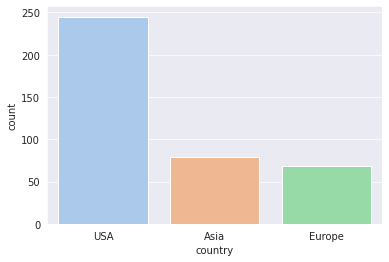

In [ ]:
sns.countplot(df['country'])

In [ ]:
df['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


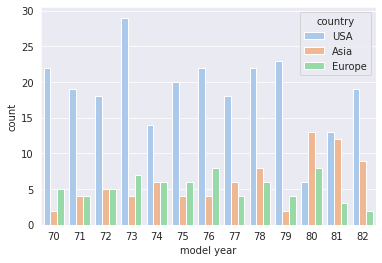

In [ ]:
sns.countplot(df['model year'], hue = df['country'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


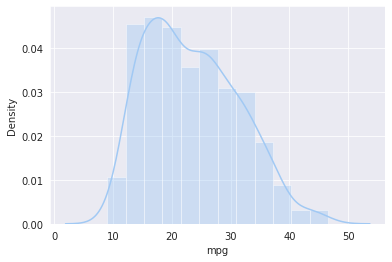

In [ ]:
sns.distplot(df['mpg'])


Seeing the plot we see a little bit of positive skewness in the data. Let's check how much skewness is  there in the data

In [ ]:
from scipy import stats
print(df['mpg'].skew())
print(df['mpg'].kurtosis())

0.45709232306041025
-0.5159934946351457


Lets check milage ditribution for each country

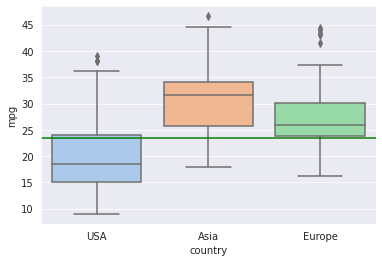

In [ ]:
#fig, axes = plt.subplot()
sns.boxplot(x= df['country'], y= df['mpg'])
plt.axhline(df['mpg'].mean(), color = 'g')

In [ ]:
x = df['mpg'].mean()
print(x)

23.44591836734694


The milage for cars in asian and european countries is more than those of USA.
This fact can be attribited the more use of older model cars in USA as compared to other Asian or European countries

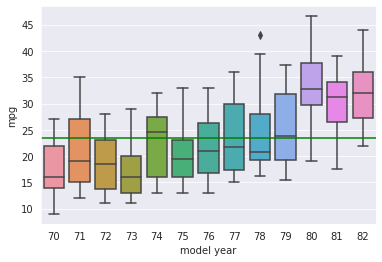

In [ ]:
#Check mpg year wise distribution
sns.boxplot(x= df['model year'], y=df['mpg'] )
plt.axhline(df['mpg'].mean(), color = 'g')

For older years the mean mpg for those years is greater than or equal to the overall average milage.

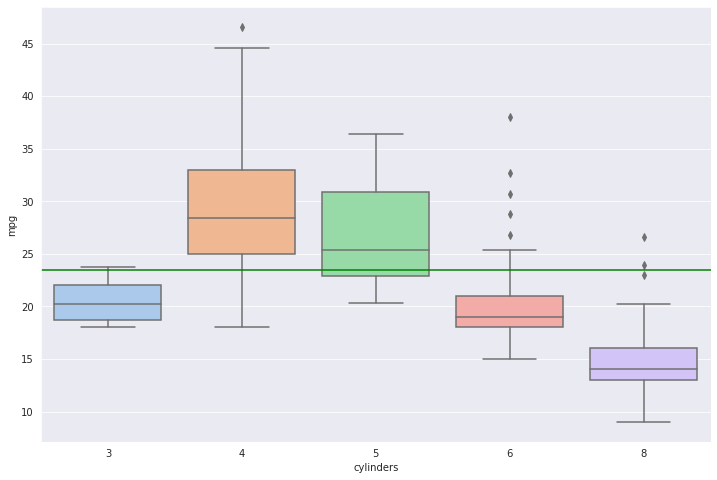

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x= df['cylinders'], y= df['mpg'])
plt.axhline(df['mpg'].mean(), color = 'g')

For cars with 4 and 5 cylinders the average milage is better than than the overall average milage.

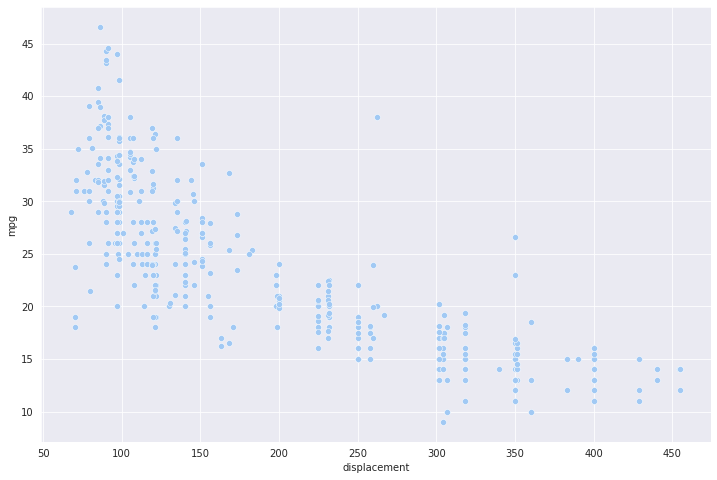

In [ ]:
#affect of weight for milage
plt.figure(figsize=(12,8))
sns.scatterplot(x =df['displacement'], y=df['mpg'])

So the **displacement is inversly proportional to milage**.
If displacement is more than milage is less and vice-verse

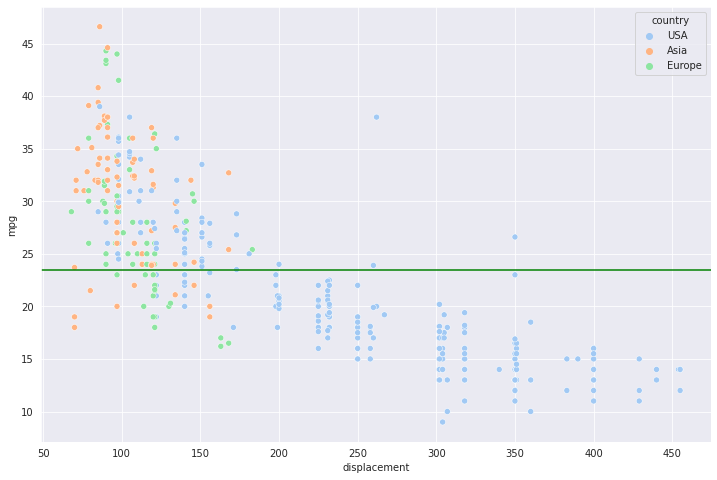

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =df['displacement'], y=df['mpg'],  hue = df['country'])
plt.axhline(df['mpg'].mean(), color = 'g')

There are two things that can be drawn form this graph:


1.   The Asian and European cars have a better milage 
2.   And the cars from USA are the worst when it comes to milage



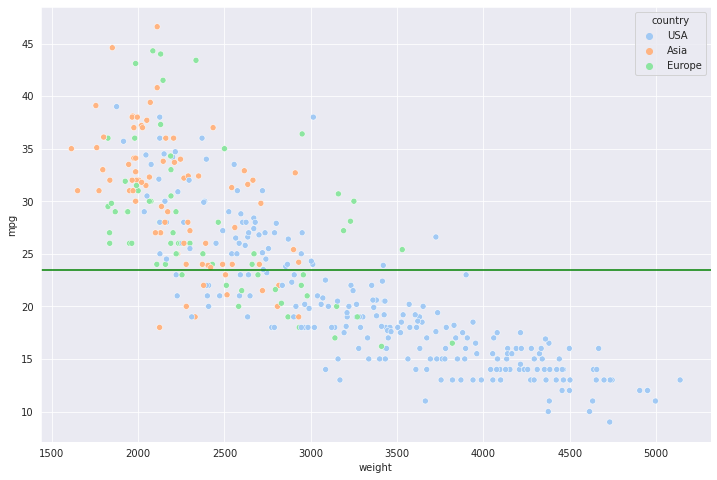

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =df['weight'], y=df['mpg'],  hue = df['country'])
plt.axhline(df['mpg'].mean(), color = 'g')

The bad overall milage can also be attributed to the weight of the cars. **Greater weight = Lesser milage**

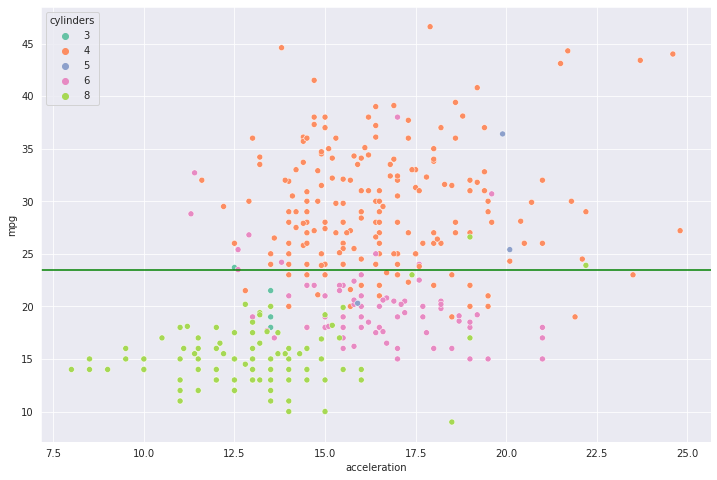

In [ ]:
#Milage vs accelaration
plt.figure(figsize=(12,8))
sns.scatterplot(x = df['acceleration'], y= df['mpg'], hue = df['cylinders'], palette='Set2')
plt.axhline(df['mpg'].mean(), color = 'g')

As already visualised, the greater number of cylinders decrease the milage 

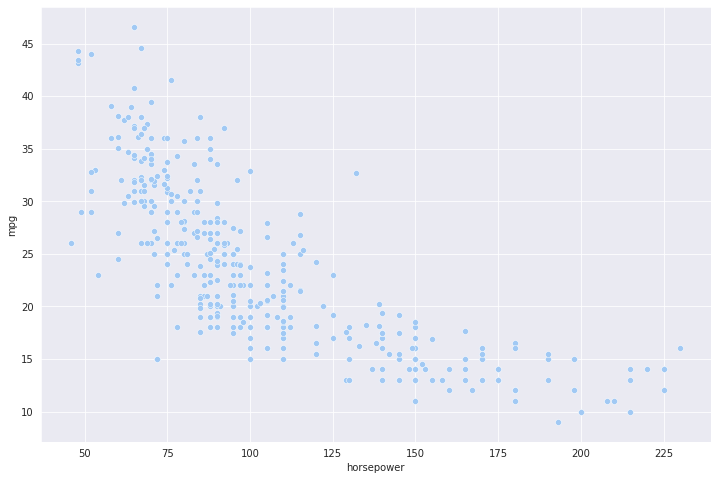

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =df['horsepower'], y= df['mpg'])

As expected with greater horsepower the fuel efficiency also decrease.

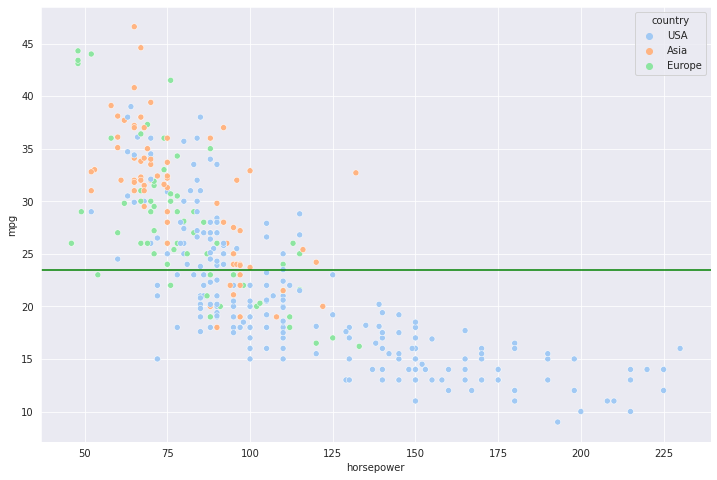

In [ ]:
# check horsepwer distribution countrywise
plt.figure(figsize=(12,8))
sns.scatterplot(x =df['horsepower'], y= df['mpg'], hue = df['country'])
plt.axhline(df['mpg'].mean(), color = 'g')

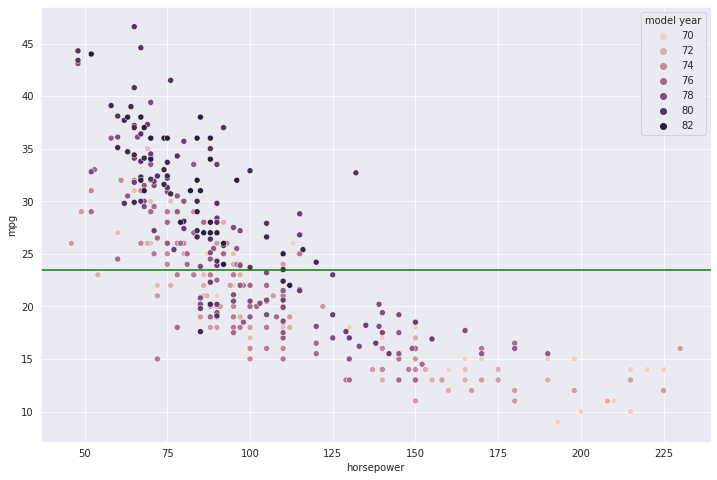

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =df['horsepower'], y= df['mpg'], hue = df['model year'])
plt.axhline(df['mpg'].mean(), color = 'g')

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'country'],
      dtype='object')

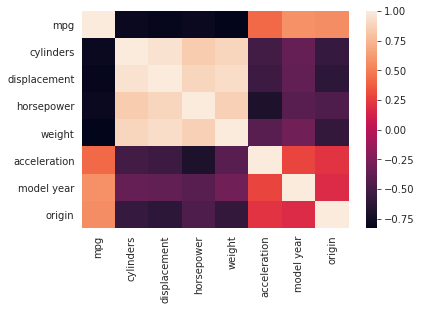

In [ ]:
cor = df.drop(['country', 'car name'], axis = 1).corr()
sns.heatmap(cor)

So we have cylinders, displacement, horsepower, weight that have a highly negetive correlation with milage 
And accelaration, model year, origin having a positive correlation with milage

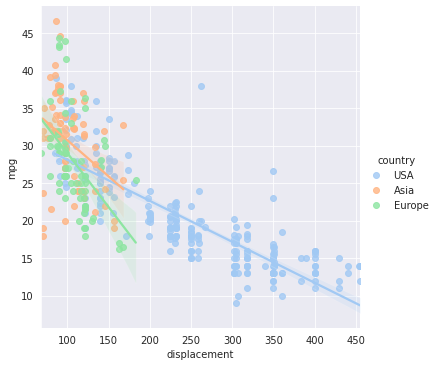

In [ ]:
sns.lmplot(x = 'displacement', y = 'mpg',  data= df, hue = 'country' )

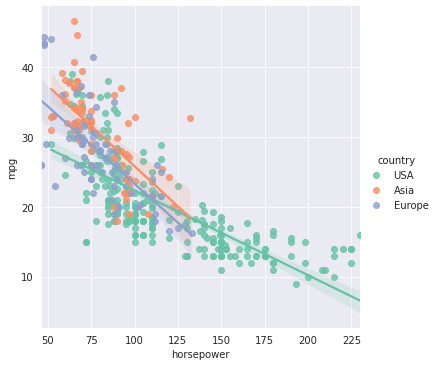

In [ ]:
sns.lmplot(x = 'horsepower', y = 'mpg',  data= df, hue = 'country', palette= 'Set2' )

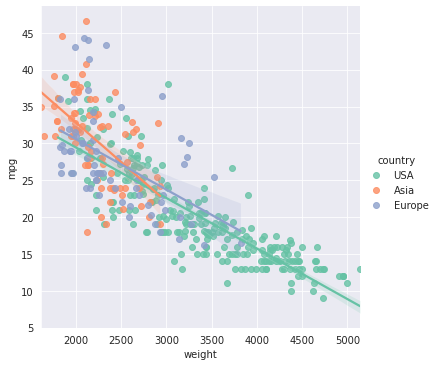

In [ ]:
sns.lmplot(x = 'weight', y = 'mpg',  data= df, hue = 'country', palette= 'Set2' )

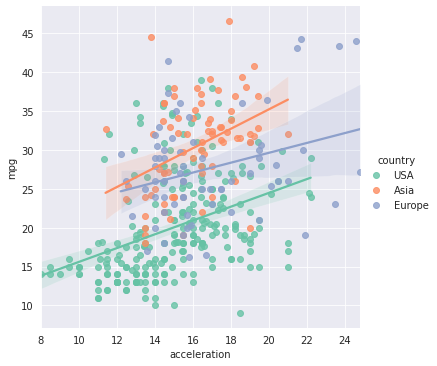

In [ ]:
sns.lmplot(x = 'acceleration', y = 'mpg',  data= df, hue = 'country', palette= 'Set2' )

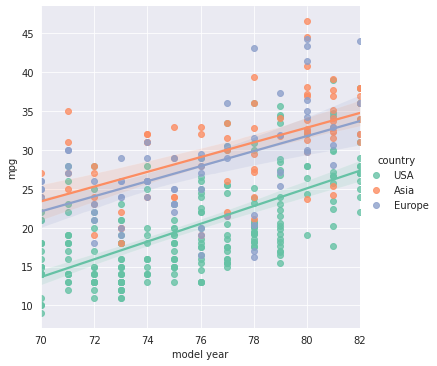

In [ ]:
sns.lmplot(x = 'model year', y = 'mpg',  data= df, hue = 'country', palette= 'Set2' )

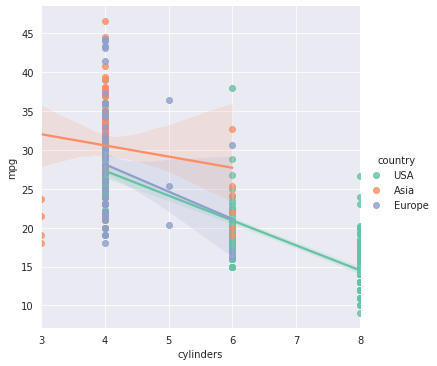

In [ ]:
sns.lmplot(x = 'cylinders', y = 'mpg',  data= df, hue = 'country', palette= 'Set2' )

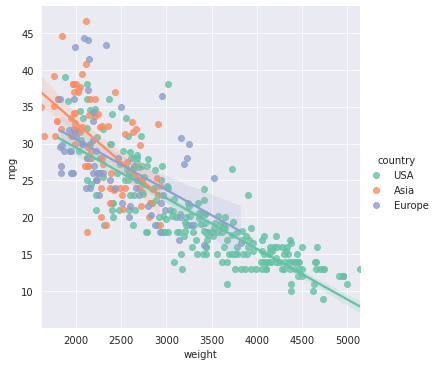

In [ ]:
sns.lmplot(x = 'weight', y = 'mpg',  data= df, hue = 'country', palette= 'Set2' )

# Training Model

For training a model for predicting the milage we will use different training algorithms:


1.   Decision Tree Classifier
2.   Linear Classifier
3.   Graient Boosting





In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,country
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,USA
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,USA
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,USA
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,USA
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,USA


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
X = df.drop(['mpg','country', 'car name'], axis=1)
y = df['mpg']
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42 )

In [ ]:
X_train.shape

(294, 7)

In [ ]:
X_test.shape

(98, 7)

In [ ]:
#Linear Regression
LinearModel = LinearRegression()
LinearModel.fit(X_train, y_train)
LinearModelPredict = LinearModel.predict(X_test)

In [ ]:
LinearModelScore = mean_squared_error(y_test, LinearModelPredict)
LinearModelScore

10.142558454927475

In [ ]:
#Decision Tree
DecisionTreeModel = DecisionTreeRegressor()
DecisionTreeModel.fit(X_train, y_train)
DecisionTreeModelPredict = DecisionTreeModel.predict(X_test)
DecisionTreeModelScore = mean_squared_error(y_test, DecisionTreeModelPredict)
DecisionTreeModelScore 


12.132857142857143

In [ ]:
#Gradient Boosting
GBR = GradientBoostingRegressor(n_estimators=4000)
GBR.fit(X_train, y_train)
GBRPredict = GBR.predict(X_test)
GBRScore = mean_squared_error(y_test, GBRPredict)
GBRScore

7.217708086618871

In [ ]:
param = {
    'n_estimators' : [100,4000,5000],
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] 
}
Grid = GridSearchCV(GBR, param_grid= param, cv =5)
Grid.fit(X_train, y_train)
GridPredict = Grid.predict(X_test)
GridScore = mean_squared_error(y_test, GridPredict)


In [ ]:
GridScore

6.946170925911129

In [ ]:

models = pd.DataFrame({
    'Model': ['Linear Model', 'Decision Tree', 'GBR', 'Grid Search'],
    'Score': [LinearModelScore, DecisionTreeModelScore, GBRScore, GridScore]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Decision Tree,12.132857
0,Linear Model,10.142558
2,GBR,7.217708
3,Grid Search,6.946171
